<a href="https://colab.research.google.com/github/KamilShape/emotion_recognition/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

In [1]:
#Libraries
import os
import cv2
from google.colab.patches import cv2_imshow
import shutil
#----------------visualisation---------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#----------------keras-----------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import keras

In [2]:
data_path = 'drive/MyDrive/faces/data'

In [3]:
people = ['smiling-person', 'anger-person', 'disgust-person', 'fear-person', 'surprise-person' ]

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
photos_number = []
for person in people:
  photos_number.append(len(os.listdir(f'{data_path}/{person}')))

In [6]:
photos_number

[0, 0, 0, 0, 0]

### 1.1 Data visualisation

In [7]:
# fig, ax = plt.subplots(figsize = (8,6))
# ax.bar(people, photos_number, color='wheat', width=0.6)
# ax.set_title('PHOTOS')
# ax.set_ylabel('Amount')

# for i in range(0, len(people)):
#   ax.text(people[i], photos_number[i] - 20, horizontalalignment='center', s=photos_number[i] )

ValueError: ignored

<Figure size 800x600 with 1 Axes>

*Dataset is quite balanced.*

# **2. Train and test set**

In [7]:
train_path = 'drive/MyDrive/faces/train'

In [8]:
test_path = 'drive/MyDrive/faces/test'

In [9]:
def create_set(faces, path, new_path, set_size):
  for face in faces:
    files_folder = os.listdir(f'{path}/{face}')
    for n in range(0, round(len(files_folder)*set_size)):
      files_folder = os.listdir(f'{path}/{face}')
      photo_number = np.random.randint(len(files_folder))
      print(photo_number)
      os.makedirs(f'{new_path}/{face}', exist_ok=True)
      os.replace(f'{path}/{face}/{files_folder[photo_number]}', f'{new_path}/{face}/{files_folder[photo_number]}')

In [ ]:
#creating train set
create_set(people, data_path, train_path, 0.8)

In [ ]:
#creating test set
create_set(people, data_path, test_path, 1)

In [22]:
imageee = cv2.imread(f'drive/MyDrive/faces/train/%C5%9Bmieszne-nerdy-cz%C5%82owiek-patrz%C4%85c-intensywnie-w-vintage-komputer')

In [24]:
cv2_imshow(imageee)

AttributeError: ignored

# **3. Face detection**

In [10]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
def face_recognition(photo, array):
  image = cv2.imread(photo)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  face = face_classifier.detectMultiScale(gray_image, 1.3, 4)
  if len(face) > 0:
   for i, (x, y, w, h) in enumerate(face):
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)
      face = image[y:y + h, x:x + w]
      array.append(face)

In [19]:
smiling_faces_test = []
anger_faces_test = []
disgust_faces_test = []
fear_faces_test = []
surprise_faces_test = []

In [20]:
smiling_faces_train = []
anger_faces_train = []
disgust_faces_train = []
fear_faces_train = []
surprise_faces_train = []

In [17]:
def faces_array(array, photos, path):
  files_folder = os.listdir(f'{path}/{photos}')
  print(f'{path}/{photos}')
  for i in range(0, len(files_folder)):
    img_path = f'{path}/{photos}/{files_folder[i]}'
    print(img_path)
    face_recognition(img_path, array)

In [ ]:
# ['smiling-person', 'anger-person', 'disgust-person', 'fear-person', 'surprise-person' ]
faces_array(smiling_faces_test, "smiling-person", train_path)
faces_array(anger_faces_test, "anger-person", train_path)
faces_array(disgust_faces_test, "disgust-person", train_path)
faces_array(fear_faces_test, "fear-person", train_path)
faces_array(surprise_faces_test, "surprise-person", train_path)

In [ ]:
faces_array(smiling_faces_train, "smiling-person", test_path)
faces_array(anger_faces_train, "anger-person", test_path)
faces_array(disgust_faces_train, "disgust-person", test_path)
faces_array(fear_faces_train, "fear-person", test_path)
faces_array(surprise_faces_train, "surprise-person", test_path)

In [21]:
test_recognized_faces = {
    'smiling-faces': smiling_faces_test,
    'anger-person' : anger_faces_test,
    'disgust-person' : disgust_faces_test,
    'fear_faces' : fear_faces_test,
    'surprise-person' : surprise_faces_test
}

In [23]:
train_recognized_faces = {
    'smiling-faces': smiling_faces_test,
    'anger-person' : anger_faces_test,
    'disgust-person' : disgust_faces_test,
    'fear_faces' : fear_faces_test,
    'surprise-person' : surprise_faces_test
}

In [ ]:
train_recognized_faces['smiling-faces']

<class 'numpy.ndarray'>


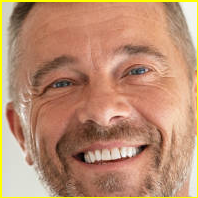

<class 'NoneType'>
RGB
(198, 198)


In [16]:
from PIL import Image
from numpy import asarray
# # load the image
# image = Image.open('kolala.jpeg')
# # convert image to numpy array
# data = asarray(image)
# print(type(data))
# # summarize shape
# print(data.shape)

# create Pillow image
image2 = Image.fromarray(smiling_faces[1])
print(type(smiling_faces[1]))
imig = cv2_imshow(smiling_faces[1])
print(type(imig))
# summarize image details
print(image2.mode)
print(image2.size)

# **4.Model**

In [ ]:
img_height = 64
img_width = 64
batch_size = 100

In [20]:
#train and validation split
train_ds = keras.utils.split_dataset(recognized_faces, left_size=0.8, shuffle=False, seed=None)

# val_ds = keras.utils.image_dataset_from_directory(
#     train_path,
#     validation_split = 0.3,
#     seed=0,
#     subset='validation',
#     image_size = (img_height, img_width),
#     batch_size = batch_size,
#     label_mode = 'categorical')

TypeError: ignored

In [ ]:
train_ds

NameError: ignored

In [ ]:
model = Sequential()
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.RandomRotation(factor = (-1, 1), fill_mode='reflect', interpolation='bilinear',))

model.add(layers.Conv2D(32, (5,5), padding='same', activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Rescaling(scale=2, offset=0.0))

model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.1))

model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))